In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error

In [62]:
df = pd.read_csv('/content/data.csv')

In [63]:
df

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,American Beauty,movie,Drama,1999.0,tt0169547,8.3,1241415.0,NaN
1,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,522811.0,NaN
2,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,tt0266697,8.2,1239104.0,NaN
3,Jarhead,movie,"Biography, Drama, War",2005.0,tt0418763,7.0,214091.0,NaN
4,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,449676.0,NaN
...,...,...,...,...,...,...,...,...
20872,American Manhunt: O.J. Simpson,tv,Documentary,2025.0,tt35456246,7.5,2474.0,NaN
20873,Devil's Diner,tv,"Drama, Horror",2025.0,tt35557166,7.1,464.0,NaN
20874,NaN,tv,NaN,NaN,NaN,NaN,NaN,NaN
20875,NaN,tv,NaN,2011.0,NaN,NaN,NaN,NaN


In [64]:
df.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,American Beauty,movie,Drama,1999.0,tt0169547,8.3,1241415.0,NaN
1,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,522811.0,NaN
2,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,tt0266697,8.2,1239104.0,NaN
3,Jarhead,movie,"Biography, Drama, War",2005.0,tt0418763,7.0,214091.0,NaN
4,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,449676.0,NaN


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20877 entries, 0 to 20876
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               20225 non-null  object 
 1   type                20877 non-null  object 
 2   genres              20530 non-null  object 
 3   releaseYear         20842 non-null  float64
 4   imdbId              19356 non-null  object 
 5   imdbAverageRating   19168 non-null  float64
 6   imdbNumVotes        19168 non-null  float64
 7   availableCountries  166 non-null    object 
dtypes: float64(3), object(5)
memory usage: 1.3+ MB


In [66]:
df.isnull().sum()

,0
title,652
type,0
genres,347
releaseYear,35
imdbId,1521
imdbAverageRating,1709
imdbNumVotes,1709
availableCountries,20711


In [70]:
df_cleaned = df.dropna(inplace=True)

In [71]:
df_cleaned

In [72]:
df.isnull().sum()

,0
title,0
type,0
genres,0
releaseYear,0
imdbId,0
imdbAverageRating,0
imdbNumVotes,0
availableCountries,0


In [73]:
df.head()


,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
567,Like Stars on Earth,movie,"Drama, Family",2007.0,tt0986264,8.3,215384.0,TZ
1213,Jaane Tu... Ya Jaane Na,movie,"Comedy, Drama, Romance",2008.0,tt0473367,7.4,28783.0,TZ
1464,Lagaan: Once Upon a Time in India,movie,"Drama, Musical, Sport",2001.0,tt0169102,8.1,123264.0,TZ
2325,Querô: A Damned Report,movie,Drama,2007.0,tt0945383,6.8,422.0,"BR, PT"
2581,Captain Underpants: Epic Choice-o-Rama,movie,"Action, Adventure, Animation",2020.0,tt11604750,5.8,198.0,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE..."


In [74]:
df

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
567,Like Stars on Earth,movie,"Drama, Family",2007.0,tt0986264,8.3,215384.0,TZ
1213,Jaane Tu... Ya Jaane Na,movie,"Comedy, Drama, Romance",2008.0,tt0473367,7.4,28783.0,TZ
1464,Lagaan: Once Upon a Time in India,movie,"Drama, Musical, Sport",2001.0,tt0169102,8.1,123264.0,TZ
2325,Querô: A Damned Report,movie,Drama,2007.0,tt0945383,6.8,422.0,"BR, PT"
2581,Captain Underpants: Epic Choice-o-Rama,movie,"Action, Adventure, Animation",2020.0,tt11604750,5.8,198.0,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE..."
...,...,...,...,...,...,...,...,...
19280,Trivia Quest,tv,"Adventure, Animation, Family",2022.0,tt18393972,5.7,280.0,"AD, AG, AO, AR, AT, AU, AZ, BA, BB, BG, BM, BO..."
19310,Battle Kitty,tv,"Action, Adventure, Animation",2022.0,tt10050740,6.1,364.0,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE..."
19861,Sunshine Eyes,tv,Drama,2023.0,tt16026154,6.8,11.0,"AT, DE, LI"
20129,Inside Greggs: 24/7,tv,Documentary,2023.0,tt28513332,5.1,30.0,"BM, GB, GI, IE"


In [75]:
df.describe()

,releaseYear,imdbAverageRating,imdbNumVotes
count,114.000000,114.00000,114.000000
mean,2015.333333,6.44386,4201.894737
std,7.091896,1.18643,23463.255792
min,1987.000000,2.40000,9.000000
25%,2011.250000,5.72500,59.000000
50%,2018.000000,6.55000,163.000000
75%,2020.000000,7.20000,563.250000
max,2023.000000,8.80000,215384.000000


In [76]:
df.duplicated().sum()

0

In [79]:
df.rename(columns={'imdbAverageRating': 'Rating','imdbNumVotes':'Popularity'}, inplace=True)

In [80]:
df.head()

,title,type,genres,releaseYear,imdbId,Rating,Popularity,availableCountries
567,Like Stars on Earth,movie,"Drama, Family",2007.0,tt0986264,8.3,215384.0,TZ
1213,Jaane Tu... Ya Jaane Na,movie,"Comedy, Drama, Romance",2008.0,tt0473367,7.4,28783.0,TZ
1464,Lagaan: Once Upon a Time in India,movie,"Drama, Musical, Sport",2001.0,tt0169102,8.1,123264.0,TZ
2325,Querô: A Damned Report,movie,Drama,2007.0,tt0945383,6.8,422.0,"BR, PT"
2581,Captain Underpants: Epic Choice-o-Rama,movie,"Action, Adventure, Animation",2020.0,tt11604750,5.8,198.0,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE..."


In [86]:
df.columns


Index(['title', 'type', 'genres', 'releaseYear', 'imdbId', 'Rating',
       'Popularity', 'availableCountries', 'Sequence_No', '1', '567'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS

# Visualizing missing values

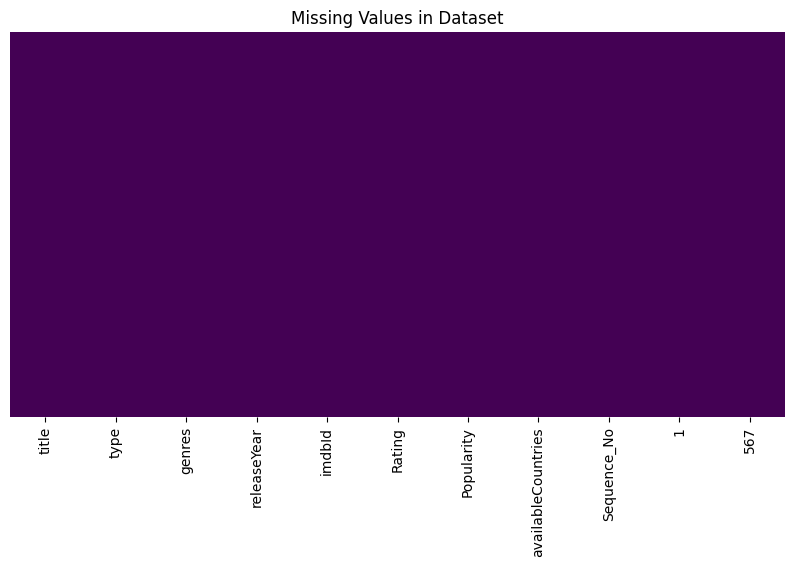

In [89]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values in Dataset")
plt.show()

# Distribution of IMDb Ratings

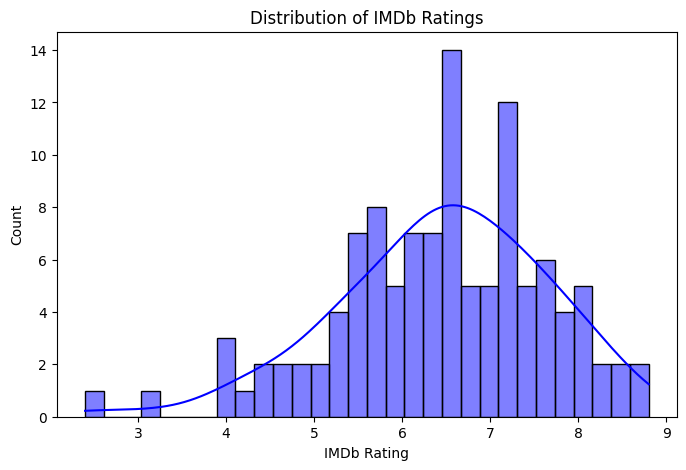

In [91]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'].dropna(), bins=30, kde=True, color='blue')
plt.title("Distribution of IMDb Ratings")
plt.xlabel("IMDb Rating")
plt.ylabel("Count")
plt.show()

# Boxplot of IMDb Ratings

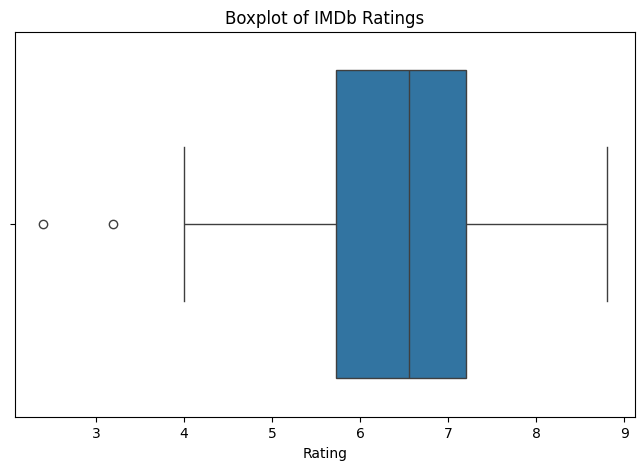

In [93]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Rating'])
plt.title("Boxplot of IMDb Ratings")
plt.show()

# Correlation heatmap of numerical columns

In [95]:
numeric_df = df.select_dtypes(include=['number'])


In [97]:
numeric_df


,releaseYear,Rating,Popularity,Sequence_No,1,567
567,2007.0,8.3,215384.0,1,1,1
1213,2008.0,7.4,28783.0,2,2,2
1464,2001.0,8.1,123264.0,3,3,3
2325,2007.0,6.8,422.0,4,4,4
2581,2020.0,5.8,198.0,5,5,5
...,...,...,...,...,...,...
19280,2022.0,5.7,280.0,110,110,110
19310,2022.0,6.1,364.0,111,111,111
19861,2023.0,6.8,11.0,112,112,112
20129,2023.0,5.1,30.0,113,113,113


<Figure size 800x500 with 0 Axes>

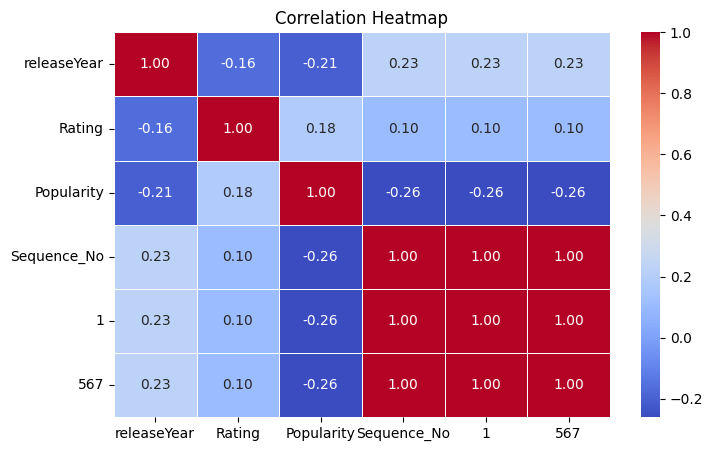

In [99]:
plt.figure(figsize=(8, 5))
plt.figure(figsize=(8, 5))
numeric_df = df.select_dtypes(include=['number'])  # Select only numerical columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()




# Countplot of 'type' column

<ipython-input-100-7689caf7569d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='pastel')


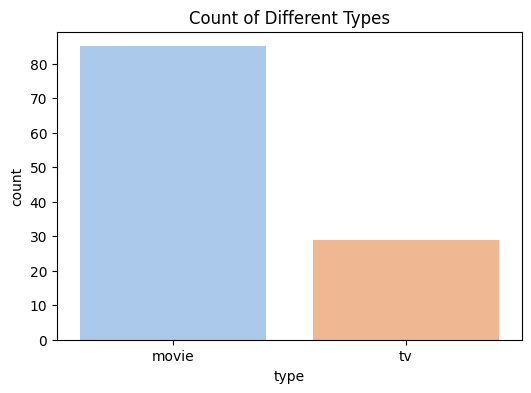

In [100]:
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=df, palette='pastel')
plt.title("Count of Different Types")
plt.show()

# Most common genres

<ipython-input-101-a1490c1230c6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='coolwarm')


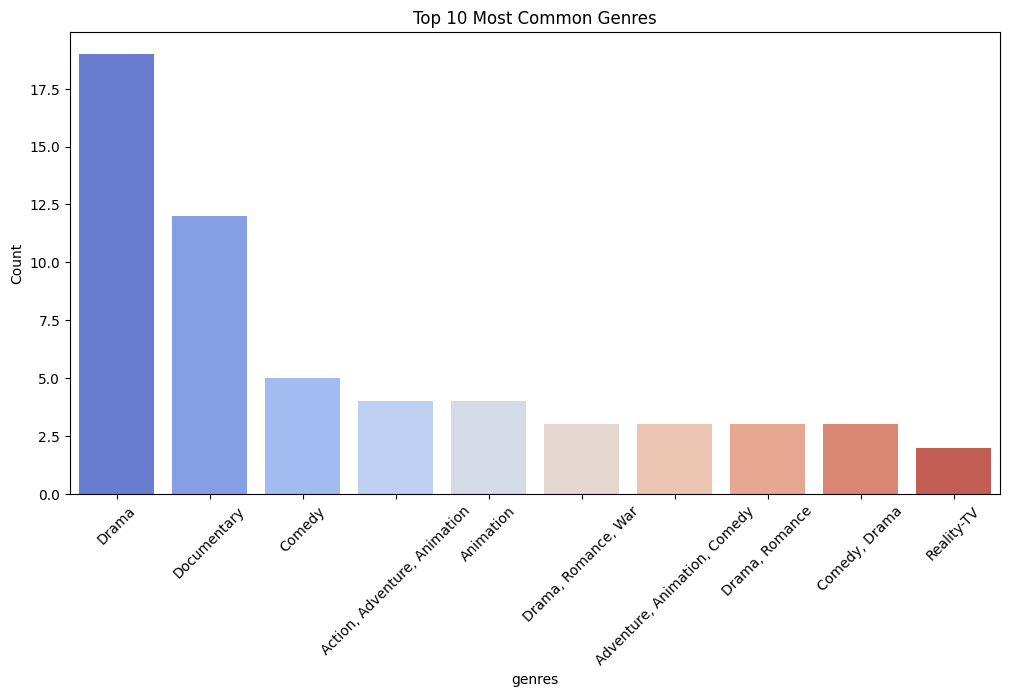

In [101]:
plt.figure(figsize=(12, 6))
genre_counts = df['genres'].value_counts().head(10)
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Top 10 Most Common Genres")
plt.ylabel("Count")
plt.show()

#  MODEL TRAINING

# Select numerical features for prediction

In [107]:
features = ['releaseYear', 'Popularity']
X = df[features].dropna()
y = df.loc[X.index, 'Rating']
print(X.shape)
print(y.shape)


(114, 2)
(114,)


# Splitting the dataset


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(91, 2)
(23, 2)
(91,)
(23,)


# Train a Linear Regression model


In [112]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Make predictions


In [114]:
y_pred = model.predict(X_test)


In [115]:
y_pred

array([6.35326956, 6.36831995, 6.40764977, 6.36334832, 6.48990649,
       6.39398087, 6.35363448, 6.35656253, 6.39375496, 6.52151041,
       6.3804336 , 6.60017874, 6.33972229, 6.32632273, 6.448726  ,
       8.4136459 , 6.35408628, 6.42186606, 6.33867791, 6.38416969,
       6.41572147, 6.455199  , 6.46229933])

# Evaluate the model


In [119]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


In [120]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.7538692258688294
R-squared (R2): 0.18933840514361333
Mean Squared Error (MSE): 0.8893677943116304
Root Mean Squared Error (RMSE): 0.9430629853364145
